In [1]:
import pandas as pd
from sklearn.metrics.pairwise import distance_metrics
from pathlib import Path
import numpy as np
from numpy.typing import NDArray
import networkx as nx
from sklearn.metrics import rand_score
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

In [2]:
x_path = Path('data/X_4_1.xlsx')
y_path = Path('data/Y_4_1.xlsx')

x_data = pd.read_excel(x_path, header=None)[:10]
y_data = pd.read_excel(y_path, header=None)[:10]

## Metric

- Rand Index

In [3]:
rand_score

<function sklearn.metrics.cluster._supervised.rand_score(labels_true, labels_pred)>

## Distances

- Euclidean
- Cosine


In [4]:
distance_metrics_dict = distance_metrics()

euclidean_distance_func = distance_metrics_dict['euclidean']
cosine_distance_func = distance_metrics_dict['cosine']

In [5]:
euclidean_distance_x = euclidean_distance_func(x_data)
cosine_distance_y = cosine_distance_func(y_data)

In [6]:
def convert_distance_to_similarity(distance_matrix: NDArray[np.float64]) -> NDArray[np.float64]:
    return 1/(1 + distance_matrix)

In [7]:
graph = nx.from_numpy_array(cosine_distance_y)

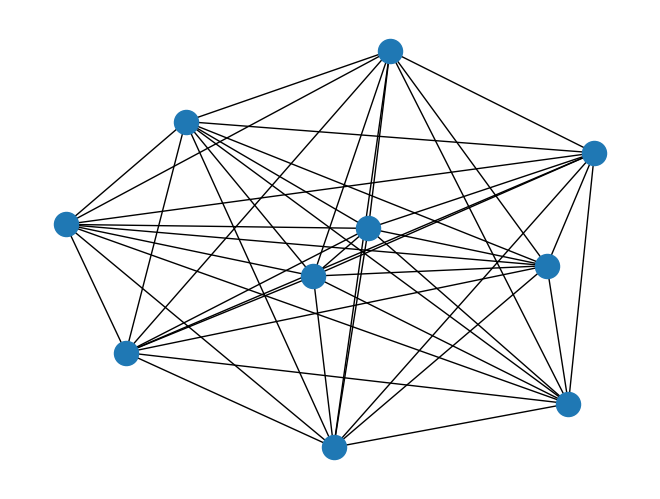

In [8]:
nx.draw(graph)

## Clustering algorithms

- K-Means
- Spectral Clustering
- Gaussian Mixture (EM)

In [9]:
KMeans
SpectralClustering
GaussianMixture

sklearn.mixture._gaussian_mixture.GaussianMixture

## Number of clusters

- The elbow rule
- The Silhouette Method

In [18]:
def elbow_rule(data: NDArray[np.float64], max_cluster: int) -> plt.Figure:
    cluster_range = np.arange(start=1, stop=max_cluster)

    inertias = []
    for num_cluster in cluster_range:
        kmeanModel = KMeans(n_clusters=num_cluster, n_init='auto').fit(data)
        kmeanModel.fit(data)
        inertias.append(kmeanModel.inertia_)

    figure = plt.gcf()
    axe = plt.axes()
    axe.plot(cluster_range, inertias, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method')
    return figure

In [60]:
import math
def get_len(v):
    """длина вектора"""
    return math.sqrt(v[0] ** 2 + v[1] ** 2)


def get_angle(v1, v2):
    """угол между двумя векторами"""
    return math.acos(
        (v1[0] * v2[0] + v1[1] * v2[1]) /
        (get_len(v1) * get_len(v2)))


def get_best_index_by_inertia(inertias: list[float], cluster_range: NDArray[np.int64]) -> int:
    max_angle = 0
    best_index = 0
    for index in range(len(inertias) - 2):
        vector_1 = inertias[index] - inertias[index+1], cluster_range[index] - cluster_range[index+1]
        vector_2 = inertias[index+1] - inertias[index+2], cluster_range[index+1] - cluster_range[index+2]
        angle = get_angle(vector_1, vector_2)
        if max_angle < angle:
            max_angle = angle
            best_index = index + 1
    return best_index


def elbow_rule(data: NDArray[np.float64], max_cluster: int) -> plt.Figure:
    cluster_range = np.arange(start=1, stop=max_cluster)

    inertias = []
    for num_cluster in cluster_range:
        kmeanModel = KMeans(n_clusters=num_cluster, n_init='auto').fit(data)
        kmeanModel.fit(data)
        inertias.append(kmeanModel.inertia_)

    best_index = get_best_index_by_inertia(inertias, cluster_range)

    figure = plt.gcf()
    axe = plt.axes()
    axe.plot(cluster_range, inertias, 'bx-')
    axe.plot([cluster_range[best_index]], [inertias[best_index]], 'ro')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method')
    return figure

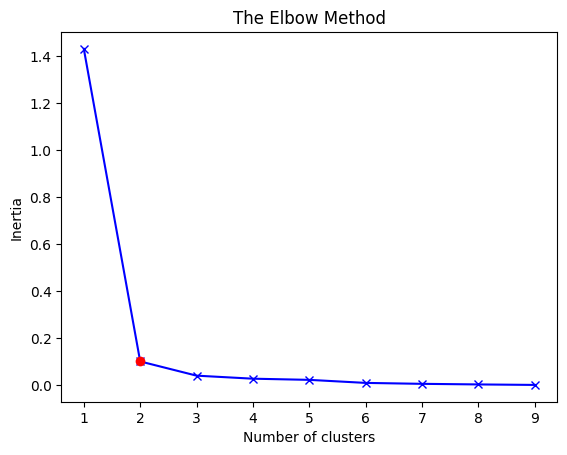

In [61]:
elbow_rule(cosine_distance_y, 10)
pass

In [62]:
def get_best_index_by_silhouette(silhouette_scores: list[float]) -> int:
    best_index = np.argmax(silhouette_scores)
    return best_index


def silhouette_method(data: NDArray[np.float64], max_cluster: int) -> plt.Figure:
    cluster_range = np.arange(start=2, stop=max_cluster)

    silhouette_scores = []
    for num_cluster in cluster_range:
        kmeanModel = KMeans(n_clusters=num_cluster, n_init='auto').fit(data)
        preds = kmeanModel.fit_predict(data)
        score = silhouette_score(data, preds)
        silhouette_scores.append(score)

    best_index = get_best_index_by_silhouette(silhouette_scores)

    figure = plt.gcf()
    axe = plt.axes()
    axe.plot(cluster_range, silhouette_scores, 'bx-')
    axe.plot([cluster_range[best_index]], [silhouette_scores[best_index]], 'ro')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('The Silhouette Method')
    return figure


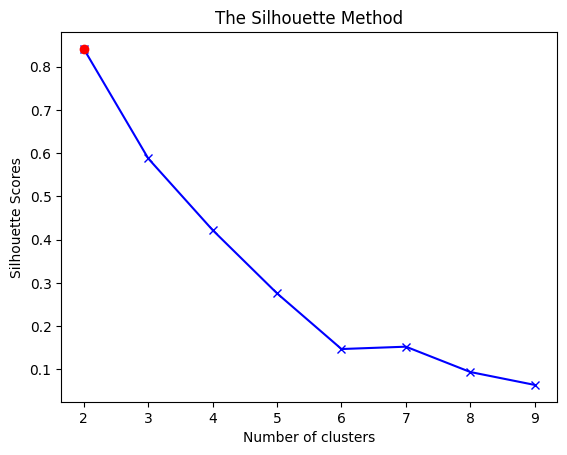

In [64]:
silhouette_method(cosine_distance_y, 10)
pass